The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Hypothesis Generation
Make it a practice to do this before solving any ML problem. Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

Time of week : Weekends usually are more busy
Time of day : Higher sales in the mornings and late evenings
Time of year : Higher sales at end of the year
Store size and location
Items with more shelf space

In [231]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [232]:
train = pd.read_csv('bigmart_train.csv')


In [233]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [234]:
train.shape

(8523, 12)

In [235]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [236]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [237]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [238]:
train['Outlet_Age'] = 2018 - train['Outlet_Establishment_Year']
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0  Supermarket Type1          3735.1380          19  
1  Supermarket Type2           443.4228           9  
2  Supermarket Type1          2097.2700          19  
3      Grocery Store           732.3800          20  
4  Supermarket Type1           994.7052          31

In [239]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [240]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales   Outlet_Age  
count        8523.000000  8523.000000  
mean         2181.288914    20.168133  
std          1706.499616     8.371760  
min            33.290000     9.000000  
25%           834.247400    14.000000  
50%          1794.331000    19.000000  
75%          3101.296400    31.000000  
max         13086.964800    33.000000

In [241]:
train['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [242]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [243]:
train['Outlet_Size'].mode()[0]

'Medium'

In [244]:
#Replacing Missing Values

train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [245]:
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [246]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [247]:
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

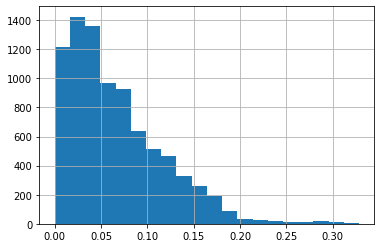

In [248]:
%matplotlib inline
train['Item_Visibility'].hist(bins=20)

In [249]:
Q1 = train['Item_Visibility'].quantile(0.25)

In [250]:
Q3 = train['Item_Visibility'].quantile(0.75)

In [251]:
IQR = Q3 - Q1

In [252]:
filt_train = train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [253]:
filt_train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0     Supermarket Type1          3735.1380          19  
1     Supermarket Type2           443.4228           9  
2     Supermarket Type1          2097.2700          19  
3         Grocery Store           732.3800          20  
4     Supermarket Type1           994.7052          31  
...                 ...                ...         ...  
8518  Supermarket Type1          2778.3834          31  
8519  Supermarket Type1           549.2850          16  
8520  Supermarket Type1          1193.1136          14  
8521  Supermarket Type2          1845.5976           9  
8522  Supermarket Type1           765.6700          21  

[8379 rows x 13 columns]

In [254]:
filt_train.shape , train.shape

((8379, 13), (8523, 13))

In [255]:
train = filt_train

In [256]:
train.shape

(8379, 13)

In [257]:
#Categareize numeric values into category

train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])


In [258]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [259]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex=True)

In [260]:
#Replaceing terms and Standardization

train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [261]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')

In [262]:
train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age Item_Visibility_bins  
0     Supermarket Type1          3735.1380          19              Low Viz  
1     Supermarket Type2           443.4228           9              Low Viz  
2     Supermarket Type1          2097.2700          19              Low Viz  
3         Grocery Store           732.3800          20              Low Viz  
4     Supermarket Type1           994.7052          31              Low Viz  
...                 ...                ...         ...                  ...  
8518  Supermarket Type1          2778.3834          31              Low Viz  
8519  Supermarket Type1           549.2850          16              Low Viz  
8520  Supermarket Type1          1193.1136          14              Low Viz  
8521  Supermarket Type2          1845.5976           9             High Viz  
8522  Supermarket Type1           765.6700          21              Low Viz  

[8379 rows x 14 columns]

In [263]:
le = LabelEncoder()

In [264]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [265]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [266]:
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [267]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [268]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [269]:
#Creating dumies for Outlet type

dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3
0              0                  1                  0                  0
1              0                  0                  1                  0
2              0                  1                  0                  0
3              1                  0                  0                  0
4              0                  1                  0                  0

In [270]:
train = pd.concat([train,dummy],axis=1)

In [271]:
train = train.drop(['Item_Identifier',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year',
       'Outlet_Type'],axis=1)

In [272]:
train

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0           9.300                 0         0.016047  249.8092            1   
1           5.920                 1         0.019278   48.2692            1   
2          17.500                 0         0.016760  141.6180            1   
3          19.200                 1         0.000000  182.0950            1   
4           8.930                 0         0.000000   53.8614            0   
...           ...               ...              ...       ...          ...   
8518        6.865                 0         0.056783  214.5218            0   
8519        8.380                 1         0.046982  108.1570            1   
8520       10.600                 0         0.035186   85.1224            2   
8521        7.210                 1         0.145221  103.1332            1   
8522       14.800                 0         0.044878   75.4670            2   

      Outlet_Location_Type  Item_Outlet_Sales  Outlet_Age  \
0                        0          3735.1380          19   
1                        2           443.4228           9   
2                        0          2097.2700          19   
3                        2           732.3800          20   
4                        2           994.7052          31   
...                    ...                ...         ...   
8518                     2          2778.3834          31   
8519                     1           549.2850          16   
8520                     1          1193.1136          14   
8521                     2          1845.5976           9   
8522                     0           765.6700          21   

      Item_Visibility_bins  Grocery Store  Supermarket Type1  \
0                        1              0                  1   
1                        1              0                  0   
2                        1              0                  1   
3                        1              1                  0   
4                        1              0                  1   
...                    ...            ...                ...   
8518                     1              0                  1   
8519                     1              0                  1   
8520                     1              0                  1   
8521                     0              0                  0   
8522                     1              0                  1   

      Supermarket Type2  Supermarket Type3  
0                     0                  0  
1                     1                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  
...                 ...                ...  
8518                  0                  0  
8519                  0                  0  
8520                  0                  0  
8521                  1                  0  
8522                  0                  0  

[8379 rows x 13 columns]

In [273]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [274]:
train.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0         9.30                 0         0.016047  249.8092            1   
1         5.92                 1         0.019278   48.2692            1   
2        17.50                 0         0.016760  141.6180            1   
3        19.20                 1         0.000000  182.0950            1   
4         8.93                 0         0.000000   53.8614            0   

   Outlet_Location_Type  Item_Outlet_Sales  Outlet_Age  Item_Visibility_bins  \
0                     0          3735.1380          19                     1   
1                     2           443.4228           9                     1   
2                     0          2097.2700          19                     1   
3                     2           732.3800          20                     1   
4                     2           994.7052          31                     1   

   Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3  
0              0                  1                  0                  0  
1              0                  0                  1                  0  
2              0                  1                  0                  0  
3              1                  0                  0                  0  
4              0                  1                  0                  0

In [275]:
X  = train.drop('Item_Outlet_Sales',axis=1)

In [276]:
y = train.Item_Outlet_Sales

In [277]:
test = pd.read_csv('bigmart_test.csv')

In [278]:
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [279]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

In [280]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [281]:
test['Item_Visibility_bins'] = train['Item_Visibility_bins'].fillna('Low Viz')

In [282]:
test['Item_Visibility_bins'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Item_Visibility_bins, dtype: float64

In [283]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg','Regular')

In [284]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [285]:
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58    20.750000          Low Fat         0.007565  Snack Foods   
1           FDW14     8.300000          Regular         0.038428        Dairy   
2           NCN55    14.600000          Low Fat         0.099575       Others   
3           FDQ58     7.315000          Low Fat         0.015388  Snack Foods   
4           FDY38    12.695633          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007      Medium   
2  241.7538            OUT010                       1998      Medium   
3  155.0340            OUT017                       2007      Medium   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Visibility_bins  
0               Tier 1  Supermarket Type1                   1.0  
1               Tier 2  Supermarket Type1                   1.0  
2               Tier 3      Grocery Store                   1.0  
3               Tier 2  Supermarket Type1                   1.0  
4               Tier 3  Supermarket Type3                   1.0

In [287]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])
test['Outlet Age'] = le.fit_transform(test['Outlet_Establishment_Year'])
dummy = pd.get_dummies(test['Outlet_Type'])
dummy.head()

Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3
0              0                  1                  0                  0
1              0                  1                  0                  0
2              1                  0                  0                  0
3              0                  1                  0                  0
4              0                  0                  0                  1

In [288]:
test = pd.concat([test,dummy],axis=1)

In [289]:
X_test = test.drop(['Item_Identifier','Item_Type','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [290]:
X.columns,X_test.columns 

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Outlet Age', 'Grocery Store',
        'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [291]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size = 0.3,random_state = 42)

In [292]:
lin = LinearRegression()

In [293]:
lin.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [294]:
print(lin.coef_)
lin.intercept_

[    3.32565903    27.49948402  -196.15278716    15.96531149
    16.76148752     8.04121542    -2.28120926    17.62300318
 -1753.70556394   219.18652367  -122.33893469  1656.85797495]


-193.53688992599064

In [295]:
predictions = lin.predict(xtest)

In [296]:
print(sqrt(mean_squared_error(ytest,predictions)))

1118.41605258575


In [297]:
from sklearn.linear_model import Ridge
ridgereg =  Ridge(alpha=0.001,normalize=True)

In [298]:
ridgereg.fit(xtrain,ytrain)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [299]:
print(sqrt(mean_squared_error(ytrain,ridgereg.predict(xtrain))))

1139.5277714448032


In [300]:
print(sqrt(mean_squared_error(ytest,ridgereg.predict(xtest))))

1118.3593685856831


In [302]:
print('R2 value/Coefficent of Determination:{}'.format(ridgereg.score(xtest,ytest)))

R2 value/Coefficent of Determination:0.548659756640925


In [303]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001,normalize=True)
lassoreg.fit(xtrain,ytrain)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [304]:
print(sqrt(mean_squared_error(ytrain,lassoreg.predict(xtrain))))

1139.5271102348174


In [305]:
print(sqrt(mean_squared_error(ytest,lassoreg.predict(xtest))))

1118.409534783899


In [306]:
print('R2 value/Coefficent of Determination:{}'.format(lassoreg.score(xtest,ytest)))

R2 value/Coefficent of Determination:0.548619264232897


In [307]:
from sklearn.linear_model import ElasticNet

In [308]:
Elas = ElasticNet(alpha=0.001,normalize=True)

In [309]:
Elas.fit(xtrain,ytrain)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [310]:
print(sqrt(mean_squared_error(ytrain,Elas.predict(xtrain))))

1477.9201935157498


In [311]:
print(sqrt(mean_squared_error(ytest,Elas.predict(xtest))))

1429.1476301155994


In [312]:
print('R2 value/Coefficent of Determination:{}'.format(Elas.score(xtest,ytest)))

R2 value/Coefficent of Determination:0.2629524867556172
